In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [4]:
df=pd.read_csv("Train.csv")

In [5]:
df1=pd.read_csv("Test.csv")

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
InvoiceNo      122049 non-null int64
StockCode      122049 non-null int64
Description    122049 non-null int64
Quantity       122049 non-null int64
InvoiceDate    122049 non-null object
CustomerID     122049 non-null float64
Country        122049 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['first_2_CID']=df['CustomerID'].apply(lambda x: int(str(x)[:2]))   # extract the first two number of the customerid
df1['first_2_CID']=df1['CustomerID'].apply(lambda x: int(str(x)[:2])) #feature extrzction

In [9]:
df.head() #there are no null values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first_2_CID
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,14
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,13
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,15
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,15
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,13


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282159 entries, 0 to 284779
Data columns (total 9 columns):
InvoiceNo      282159 non-null int64
StockCode      282159 non-null int64
Description    282159 non-null int64
Quantity       282159 non-null int64
InvoiceDate    282159 non-null object
UnitPrice      282159 non-null float64
CustomerID     282159 non-null float64
Country        282159 non-null int64
first_2_CID    282159 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 21.5+ MB


In [11]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df1["InvoiceDate"]=pd.to_datetime(df1["InvoiceDate"]) #change to date type

In [12]:
df["InvoiceDateO"]=df["InvoiceDate"].apply(lambda x: x.toordinal())
df1["InvoiceDateO"]=df1["InvoiceDate"].apply(lambda x: x.toordinal()) #change date to ordinal data

In [13]:
df.InvoiceNo.nunique()

20971

In [14]:
#df=df.sort_values("StockCode")

In [15]:
#df[df["InvoiceDate"].dt.month==12]

In [16]:
df.info() #all data type is now correct

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282159 entries, 0 to 284779
Data columns (total 10 columns):
InvoiceNo       282159 non-null int64
StockCode       282159 non-null int64
Description     282159 non-null int64
Quantity        282159 non-null int64
InvoiceDate     282159 non-null datetime64[ns]
UnitPrice       282159 non-null float64
CustomerID      282159 non-null float64
Country         282159 non-null int64
first_2_CID     282159 non-null int64
InvoiceDateO    282159 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 23.7 MB


In [17]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [18]:
#df1[df1['Country']==35]

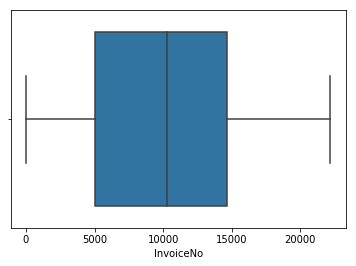

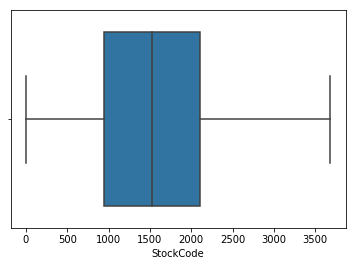

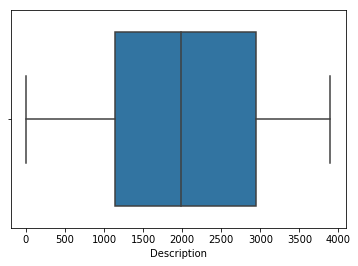

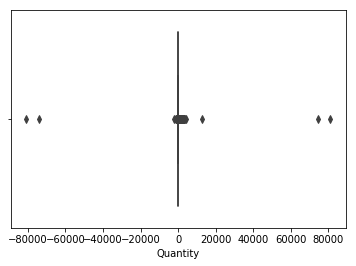

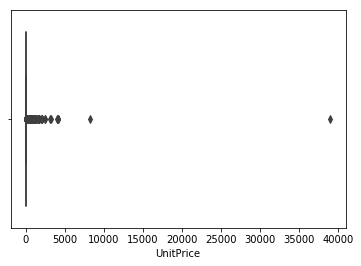

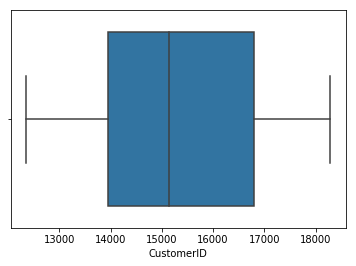

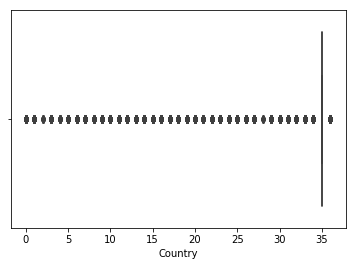

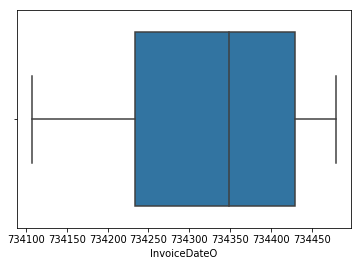

In [19]:
for i in df[['InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'Country','InvoiceDateO']].columns:
    sns.boxplot(df[i])
    plt.show() #check for outliers 
#looks like quantity and unitprice has some outliers

In [20]:
df[df["UnitPrice"]>5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first_2_CID,InvoiceDateO
140723,20237,3681,2140,-1,2011-06-10 15:31:00,38970.00,15098.0,35,15,734298
239556,19848,3683,2624,-1,2011-05-03 12:51:00,8142.75,16029.0,35,16,734260


In [21]:
#df[df['InvoiceDateO']==734298]

In [22]:
#df.drop(labels=[239556],inplace=True)

### Using this value because the data is randomly selected in for training and testing so this can be used for trees based algorithm you will know more which algorithm is suitable at the bottom

In [23]:
df.drop(df[df["UnitPrice"]>10000].index,inplace=True) 
#df.reset_index(drop=True,inplace=True)

In [24]:
#df[df["UnitPrice"]==0]

In [25]:
#df1[df1['Quantity']<0] #quantity cannot be negative it could be a grabage or the quantity is by mistake negative

In [26]:
df['Quantity']=df['Quantity'].abs()
df1['Quantity']=df1['Quantity'].abs() #quantity has negative which is invalid and also they are not garbage value 
#converting them to positive

In [27]:
#df.drop(df[df["Quantity"]>10000].index,inplace=True) #10k

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282158 entries, 0 to 284779
Data columns (total 10 columns):
InvoiceNo       282158 non-null int64
StockCode       282158 non-null int64
Description     282158 non-null int64
Quantity        282158 non-null int64
InvoiceDate     282158 non-null datetime64[ns]
UnitPrice       282158 non-null float64
CustomerID      282158 non-null float64
Country         282158 non-null int64
first_2_CID     282158 non-null int64
InvoiceDateO    282158 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 23.7 MB


In [29]:
df1.describe()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,first_2_CID,InvoiceDateO
count,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000
mean,9940.419692,1572.955788,2026.412744,12.867201,15286.445256,32.836795,14.785766,734327.734426
std,5554.116349,845.106082,1087.697388,54.143504,1711.887591,6.726816,1.722477,112.906319
min,0.000000,0.000000,0.000000,1.000000,12347.000000,0.000000,12.000000,734107.000000
25%,5018.000000,937.000000,1147.000000,2.000000,13953.000000,35.000000,13.000000,734232.000000
50%,10311.000000,1523.000000,1987.000000,5.000000,15152.000000,35.000000,15.000000,734349.000000
75%,14635.000000,2106.000000,2945.000000,12.000000,16782.000000,35.000000,16.000000,734430.000000
max,22189.000000,3683.000000,3895.000000,9360.000000,18287.000000,36.000000,18.000000,734480.000000


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 9 columns):
InvoiceNo       122049 non-null int64
StockCode       122049 non-null int64
Description     122049 non-null int64
Quantity        122049 non-null int64
InvoiceDate     122049 non-null datetime64[ns]
CustomerID      122049 non-null float64
Country         122049 non-null int64
first_2_CID     122049 non-null int64
InvoiceDateO    122049 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 8.4 MB


# EDA

In [31]:

df.corr() 

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,first_2_CID,InvoiceDateO
InvoiceNo,1.000000,0.086655,0.024443,0.002228,0.013038,-0.007367,0.005275,-0.008902,0.941553
StockCode,0.086655,1.000000,-0.013278,0.002156,0.043292,0.003349,0.006330,0.003351,0.085115
Description,0.024443,-0.013278,1.000000,0.000794,-0.001653,-0.005036,-0.014644,-0.005748,0.027387
Quantity,0.002228,0.002156,0.000794,1.000000,-0.002579,-0.004713,-0.006750,-0.004311,-0.001218
UnitPrice,0.013038,0.043292,-0.001653,-0.002579,1.000000,-0.012987,-0.016252,-0.012741,-0.003317
CustomerID,-0.007367,0.003349,-0.005036,-0.004713,-0.012987,1.000000,0.388989,0.985823,-0.002617
Country,0.005275,0.006330,-0.014644,-0.006750,-0.016252,0.388989,1.000000,0.407112,0.006856
first_2_CID,-0.008902,0.003351,-0.005748,-0.004311,-0.012741,0.985823,0.407112,1.000000,-0.004325
InvoiceDateO,0.941553,0.085115,0.027387,-0.001218,-0.003317,-0.002617,0.006856,-0.004325,1.000000


linear correlation is very less w.r.t unitprice with every variable so there could be a 
non linear correlation

In [32]:
from scipy.stats import spearmanr, pearsonr
spearmanr(df['UnitPrice'], df['Quantity']) 

SpearmanrResult(correlation=-0.41419153314474627, pvalue=0.0)

unit price and quantity has high non linear correlation

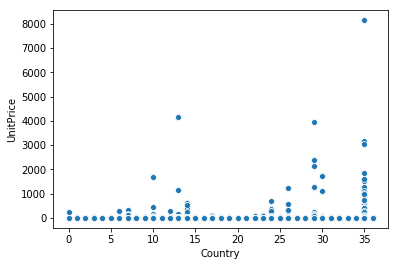

In [33]:
sns.scatterplot(x="Country",y="UnitPrice",data=df)  

in country 35 ,14 and 30 there are comparatively high unit price

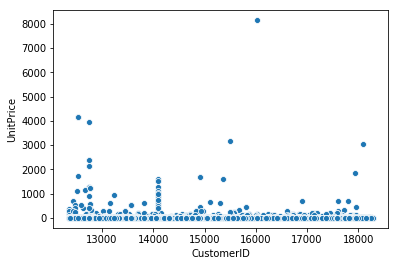

In [34]:
sns.scatterplot(x="CustomerID",y="UnitPrice",data=df) 

low customer id has also high unit price with low prices

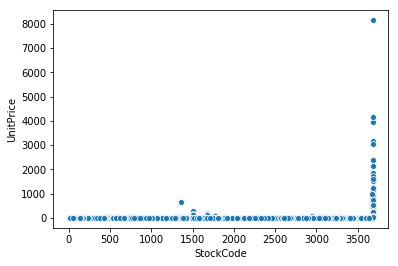

In [35]:
sns.scatterplot(x="StockCode",y="UnitPrice",data=df)

3700 or 3800 has also high unit price with low unitprice

# Data Processing

In [36]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'CustomerID', 'Country', 'first_2_CID', 'InvoiceDateO'],
      dtype='object')

In [37]:
X_train=df[['InvoiceDateO','Quantity','StockCode', 'Description','Country','first_2_CID']]
y_train=df1[['InvoiceDateO','Quantity','StockCode', 'Description',  'Country', 'first_2_CID']]
X_test=df['UnitPrice'].values

In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)
#X_test = sc.transform(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# ML Algorithms

 ### Compared all algorithm and got extra trees regressor with high accuracy as they use all their data in making trees                   

### you can see the algorithm in the apendix

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
extra1=ExtraTreesRegressor(max_depth=200,
  n_estimators=200)
extra1.fit(X_train,X_test)
np.mean(cross_val_score(extra1,X_train,X_test,scoring = 'neg_mean_squared_error', cv= 3))#36.9 #7.5569158 #.3212 #7.55609

-735.3218893648645

In [42]:
results = extra1.predict(y_train)

In [43]:
df1['UnitPrice']=results

In [44]:
df1['UnitPrice'].to_csv("Submission_Final.csv",header=True,index=False)

### Used genetic algorithm for optimization for extra tree

In [ ]:
#from tpot import TPOTRegressor


#tpot_classifier = TPOTRegressor(generations= 5, population_size= 24, offspring_size= 12,
#                                 verbosity= 2, early_stop= 12,
#                                 config_dict={'sklearn.ensemble.ExtraTreesRegressor': param}, 
#                                 cv = 2)
#tpot_classifier.fit(X_train,X_test)

In [ ]:
#results=tpot_classifier.predict(y_train)

In [ ]:
#tpot_classifier.fitted_pipeline_

In [ ]:
#tpot.score(X_train, X_test)

In [ ]:
#tpot.export(path_to_pipeline)
#pickle.dump(tpot.fitted_pipeline_, open(file_name, ‘wb’))
#import pickle
#tpot.score(X_train, X_test)
#pickle.dump(tpot.fitted_pipeline_, open("tpot.pkl", "wb"))
#tpot.export("tpot.py")
#tpot.export()

# Appendix

In [821]:
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, X_test)
y_pred=classifier.predict(X_train)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(X_test,y_pred))#36.9

12.204171627459257

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
model = CatBoostRegressor(
max_depth=10,
        n_estimators=100,
        learning_rate=1)
model.fit( X_train,X_test, use_best_model=True, silent=True )
y_pred=model.predict(X_train)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(X_test,y_pred))#36.9

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
Regressor = DecisionTreeRegressor(criterion='mse')
Regressor.fit(X_train, X_test)
np.mean(cross_val_score(Regressor,X_train,X_test, scoring = 'neg_mean_squared_error', cv= 3)) #145.88

In [ ]:
y_pred=Regressor.predict(X_train)
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test,y_pred)

In [1553]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor(300)
rf.fit(X_train, X_test)
#np.mean(cross_val_score(rf,X_train,X_test,scoring = 'neg_mean_squared_error', cv= 3)) #124
y_pred=rf.predict(X_train)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(X_test,y_pred))#36.9

8.649960678705822

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X_train, X_test)
y_pred=rf.predict(X_train)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(X_test,y_pred))#36.9

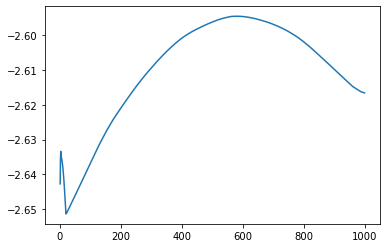

In [327]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
alpha = []
error = []

for i in range(1,1000):
    alpha.append(i/1)
    lml = Lasso(alpha=(i/1))
    error.append(np.mean(cross_val_score(lml,X_train,X_test, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [328]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
580,581.0,-2.594559


In [331]:
lm_l = Lasso(alpha=581.0)
lm_l.fit(X_train,X_test)
y_pred=lm_l.predict(X_train)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(X_test,y_pred))

24.217168519242637

In [866]:
from xgboost import XGBRegressor

C:\Users\Lenovo\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Lenovo\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [1551]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
model = XGBRegressor(  
        max_depth=100,
        n_estimators=200,
        learning_rate=1.5,bootstrap=False
        )
model.fit(X_train, X_test)
#np.mean(cross_val_score(model,X_train,X_test,scoring = 'neg_mean_squared_error', cv= 3)) #103
#max_depth=6, min_child_weight=3, nthread=1,objective='reg:squarederror', subsample=0.8
y_pred=model.predict(X_train)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(X_test,y_pred)) #6.4 #5.769 #33.5295 #57.106 #7.556915879158611

[03:01:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


7.556862321456214

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
classifier = AdaBoostRegressor( 
        n_estimators=100,
        learning_rate=1)
classifier.fit(X_train, X_test)
#np.mean(cross_val_score(classifier,X_train,X_test,scoring = 'neg_mean_squared_error', cv= 3))
y_pred=classifier.predict(X_train)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(X_test,y_pred))

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
gb_clf = GradientBoostingRegressor(
        max_depth=20,
        n_estimators=100,
        learning_rate=1)
gb_clf.fit(X_train, X_test)
#np.mean(cross_val_score(gb_clf,X_train,X_test,scoring = 'neg_mean_squared_error', cv= 3))
y_pred=gb_clf.predict(X_train)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(X_test,y_pred))

7.556915879158611

In [350]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
#d_train = lgb.Dataset(X_train, label=X_test)
#X_train, X_test, y_train, y_test = train_test_split( X_train, X_test, test_size=0.2, random_state=42)
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.5,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100,
    "n_estimators": 100
}
gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(X_train, X_test,
        eval_set=[(X_train, X_test)],
        eval_metric='l1',
        early_stopping_rounds=100)
np.mean(cross_val_score(gbm,X_train,X_test,scoring = 'neg_mean_squared_error', cv= 3)) 

D:\New folder (2)\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's l1: 2.23495	training's l2: 509.034	training's auc: 0.463572
Training until validation scores don't improve for 100 rounds
[2]	training's l1: 2.12756	training's l2: 467.537	training's auc: 0.46106
[3]	training's l1: 1.99047	training's l2: 408.886	training's auc: 0.423302
[4]	training's l1: 1.96458	training's l2: 384.363	training's auc: 0.416476
[5]	training's l1: 1.87465	training's l2: 357.001	training's auc: 0.442876
[6]	training's l1: 1.85247	training's l2: 338.982	training's auc: 0.422545
[7]	training's l1: 1.80203	training's l2: 322.213	training's auc: 0.452998
[8]	training's l1: 1.78355	training's l2: 317.111	training's auc: 0.450421
[9]	training's l1: 1.79297	training's l2: 307.1	training's auc: 0.445332
[10]	training's l1: 1.78087	training's l2: 304.408	training's auc: 0.443411
[11]	training's l1: 1.75132	training's l2: 290.739	training's auc: 0.415779
[12]	training's l1: 1.72815	training's l2: 282.841	training's auc: 0.407517
[13]	training's l1: 1.73149	training's

D:\New folder (2)\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\New folder (2)\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\New folder (2)\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


-282.1760088951373